In [1]:
%matplotlib ipympl
import pyvisco as visco
from pyvisco import styles
styles.format_fig()

***
# Verification - Comparison with APDL 2021 R1

## Raw measurement data in frequency domain

In [2]:
#Load Eplexor raw measurement data
modul = 'E'
epl_raw = visco.load.file('./freq_raw/freq_Eplexor_raw.xls')
df_raw, arr_RefT, units = visco.load.Eplexor_raw(epl_raw, modul)

#Load user provided aT
RefT = -5
shift = visco.load.file('./freq_raw/freq_Eplexor_raw__shift_factors.csv')
df_aT = visco.load.user_shift(shift)

#Or use shift algorithmn from this notebook (uncomment following line)
#df_aT = visco.master.get_aT(df_raw, RefT)

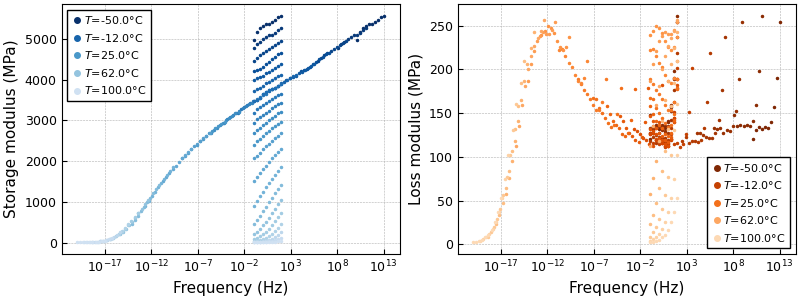

In [3]:
#Create master curve
df_master = visco.master.get_curve(df_raw, df_aT, RefT)
fig_master_shift = visco.master.plot_shift(df_raw, df_master, units)

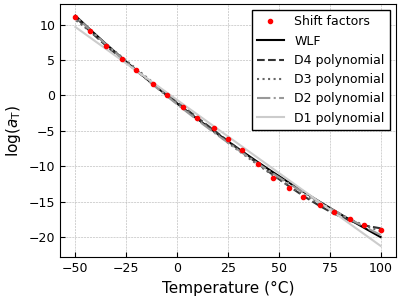

In [4]:
#Shift functions
df_WLF = visco.shift.fit_WLF(df_master.RefT, df_aT)
df_poly_C, df_poly_K = visco.shift.fit_poly(df_aT)

fig_shift, df_shift = visco.shift.plot(df_aT, df_WLF, df_poly_C)

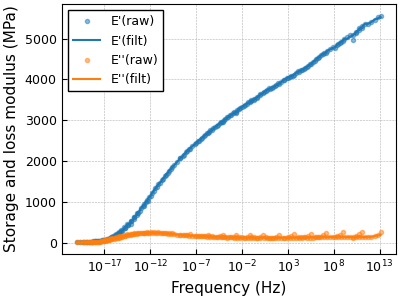

In [5]:
#Smooth master curve
win = 5
df_master = visco.master.smooth(df_master, win)
fig_smooth = visco.master.plot_smooth(df_master, units)

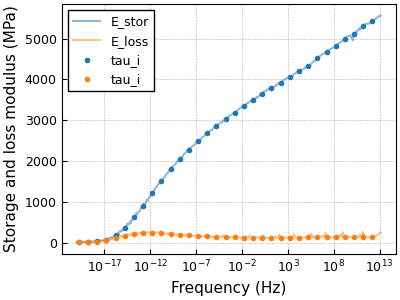

In [6]:
#Discretize number of Prony terms
df_dis = visco.prony.discretize(df_master)
fig_dis = visco.prony.plot_dis(df_master, df_dis, units)

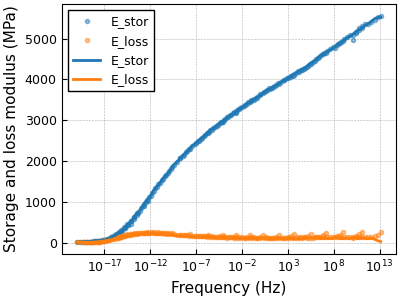

In [7]:
#Fit Prony series parameter
prony, df_GMaxw = visco.prony.fit(df_dis)
fig_fit = visco.prony.plot_fit(df_master, df_GMaxw, units)

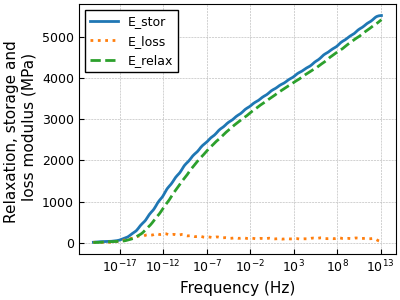

In [8]:
#Plot Generalized Maxwell model
fig_GMaxw = visco.prony.plot_GMaxw(df_GMaxw, units);

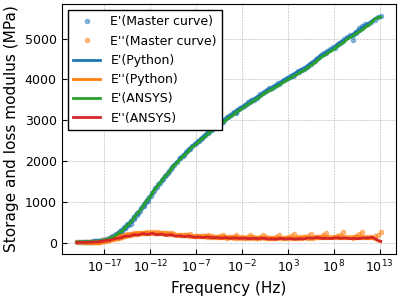

In [9]:
#Compare Python fit with ANSYS APDL
df_prony_ANSYS = visco.verify.load_prony_ANSYS('./freq_raw/prony_terms.MPL')
prony_ANSYS = visco.verify.prep_prony_ANSYS(df_prony_ANSYS, prony)
nprony = prony_ANSYS['df_terms'].shape[0]
df_GMaxw_ANSYS = visco.prony.calc_GMaxw(**prony_ANSYS, decades = nprony)
fig_fit_ANSYS = visco.verify.plot_fit_ANSYS(df_master, df_GMaxw, df_GMaxw_ANSYS, units)

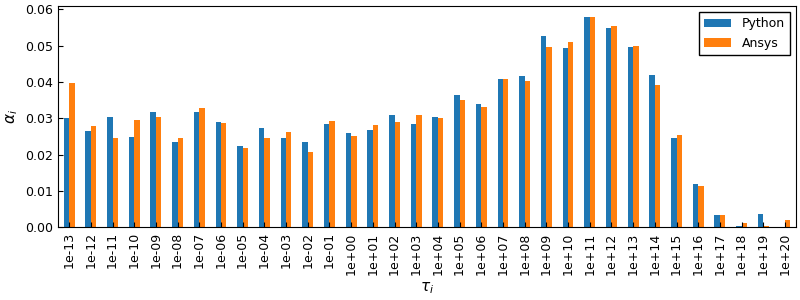

In [10]:
fig_coeff = visco.prony.plot_param([prony, prony_ANSYS], ['Python', 'Ansys'])